In [214]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
#read in data
df=pd.read_csv('train_2v.csv', index_col= 'id')

In [216]:
#examine data
df.head(5)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [217]:
#examine data
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


array([[1.        , 0.19129515],
       [0.19129515, 1.        ]])

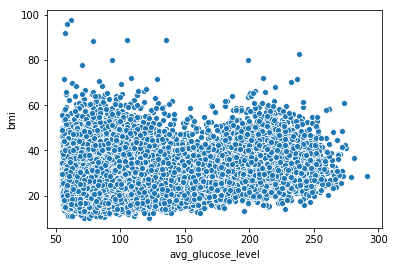

In [218]:
corr= df[df.bmi.notnull()]
sns.scatterplot('avg_glucose_level','bmi', data= corr)
np.corrcoef(corr.avg_glucose_level, corr.bmi)

In [219]:
#examine data
df[df.age<10].isnull().sum()


gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                    72
smoking_status       4285
stroke                  0
dtype: int64

In [220]:
df.loc[df.age<10,'smoking_status']='never smoked'
        


In [221]:
df[df.age<10].isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  72
smoking_status        0
stroke                0
dtype: int64

In [222]:
def glucoseClass(x):
    gl=np.percentile(df.avg_glucose_level, (20,40,60,80))
    if x<=gl[0]:
        x='0-20th'
    elif (x>gl[0] and x<gl[1]):
        x='21st-40th'
    elif (x>gl[1] and x<=gl[2]):
        x='41st-60th'
    elif (x>gl[2] and x<=gl[3]):
        x='61st-80th'
    else:
        x='81st-100th'
    return x
        
        

In [223]:

#Cut out rows with null values
t=df.copy()



#changes residency to a binary variable 1 if you have lived in an urban setting, 0 otherwise
t.Residence_type= t.Residence_type.apply(lambda x: 1 if (x.lower()=='urban') else 0)
#changes smoking to a binary variable 1 if you have been married, 0 otherwise
t.ever_married= t.ever_married.apply(lambda x: 1 if (x.lower()=='yes') else 0)
#changes smoking to a binary variable 1 if you are male, 0 otherwise
t.gender= t.gender.apply(lambda x: 1 if (x.lower()=='male') else 0)
#rename columns to match with their new values
t=t.rename(columns={'gender': 'male', 'smoking_status':'has_smoked', 'Residence_type':'urban_resident'})
#create a bmi class variable which sorts bmi values into health related distinctions
t['bmi_class']= t.bmi.apply(lambda x: 'Underweight' if x<18.5 else 'Normal' if x>=18.5 and x<25
                         else 'Overweight' if x>= 25 and x<29.9 else 'Obese' )
#create a glucose class based on what percentile in the dataset they are
t['glucose_class']= t.avg_glucose_level.apply(glucoseClass)
t=t[t.bmi.notnull()]
aget=t.copy()
t=t[t.has_smoked.notnull()]

In [224]:
for i,r in aget.iterrows():
    
    if r['has_smoked']=='nan' and r['age']<18:
        aget.loc[i, 'has_smoked']=0

aget.has_smoked=aget.has_smoked.apply(lambda x: 1 if (x=='formely smoked' or x=='smokes') else 0)

In [225]:
#changes smoking to a binary variable 1 if you have, 0 otherwise
t.has_smoked=t.has_smoked.apply(lambda x: 1 if (x.lower()=='formely smoked' or x.lower()=='smokes') else 0)


#Cut out patients under 19
t=t[t.age>19]


In [226]:
#create a columns to show how many of the major risk factors each patient has
groupt={}
for i,r in t.iterrows():
    if r['hypertension']==1 and r['heart_disease']==1:
        groupt[i]='Both'
    elif r['hypertension']==1 or r['heart_disease']==1:
        groupt[i]='One'
    else:
        groupt[i]='Neither'


In [227]:
#create a columns to show how many of the major risk factors each patient has
groupaget={}
for i,r in t.iterrows():
    if r['hypertension']==1 and r['heart_disease']==1:
        groupaget[i]='Both'
    elif r['hypertension']==1 or r['heart_disease']==1:
        groupaget[i]='One'
    else:
        groupaget[i]='Neither'

In [228]:
#add column to dataframe
groupt=pd.Series(groupt)
t['risk_factor']= groupt

aget['risk_factor']= groupt




In [229]:
aget.isnull().sum()

male                     0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
urban_resident           0
avg_glucose_level        0
bmi                      0
has_smoked               0
stroke                   0
bmi_class                0
glucose_class            0
risk_factor          14893
dtype: int64

In [230]:
t.isnull().sum()

male                 0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
urban_resident       0
avg_glucose_level    0
bmi                  0
has_smoked           0
stroke               0
bmi_class            0
glucose_class        0
risk_factor          0
dtype: int64

In this notebook, I have cleaned the data to my specifications. I removed persons under the age of 20 because there were so few strokes and that I thought the results may be misleading. Additionally, Children do not get strokes very often and so a predictor that focuses more narrowly on adults will be better suited for the problem. I also removed persons who had missing values for smoking status and bmi. I think these will both be important factors and it did not seem wise to plug in a mean bmi because how wildly that number can vary. This is a luxury of having over 20,000 data points.

I converted ever_married, gender, resident_type and smoking status to binary variables in addition to changing the name of the latter three to male, urban_resident and has_smoked, respectively. Now, has_smoked represennts whether a patient has ever smoked. I thought this was a better indicator because someone may have been a smoker for 60 years before quitting, which would certainly have incresed their likelihood of a stroke more than someone who had only been smoking for 5 years. 

In [231]:
t.to_pickle('working_data.pkl')
aget.to_pickle('working_data_with_u20.pkl')
